<a href="https://colab.research.google.com/github/vijayamurugan27/GenerativeAI/blob/main/Copy_of_RAG_with_auth_levels_Modern_AI_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modern AI Pro: Building Auth Levels on RAG Queries.
How do you ensure that different users get different results based on their auth level?

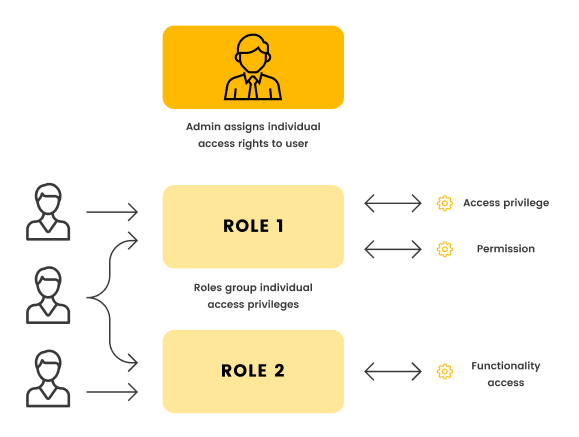

In [ ]:
!pip install -q chromadb
import chromadb
chroma_client = chromadb.Client()
collection = chroma_client.create_collection(name="auth_testing2")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.9/617.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.0 MB/s eta 0:00:00


## We will use 3 levels of role authorization and build a sample DB with different type sof content.

In [ ]:
# Document 1: Public financial summary (auth_level 1)
collection.add(documents=["This is a public summary of the financial performance in Q1. Overall, the company has shown..."],
               metadatas =[{"auth_level": 1, "category": "Summary", "quarter": "Q1", "year": "2024"}],
               ids="id1")

# Document 2: Internal financial analysis (auth_level 2)
collection.add(documents=["Internal analysis reveals that the Q1 performance, while positive, indicates potential risks..."],
               metadatas =[{"auth_level": 2, "category": "Internal Analysis", "quarter": "Q1", "year": "2024"}],
               ids="id2")

# Document 3: Confidential investment strategy (auth_level 3)
collection.add(documents=["Confidential: The investment strategy for Q2 involves focusing on emerging markets..."],
               metadatas =[{"auth_level": 3, "category": "Investment Strategy",  "source": "mywebsite.com", "quarter": "Q2", "year": "2024"}],
               ids="id3")

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:01<00:00, 66.0MiB/s]


## Query with auth levels

In [ ]:
def vector_search_with_rbac(query_text, user_auth_level):
    if not isinstance(user_auth_level, int) or user_auth_level < 0:
        raise ValueError("Invalid user_auth_level. Must be a non-negative integer.")

    try:
        results = collection.query(query_texts=[query_text],n_results=10, where={"auth_level": user_auth_level})
        return results
    except Exception as e:
        # Handle or log the error appropriately
        print(f"An error occurred: {e}")
        return []

In [ ]:
vector_search_with_rbac("Performance for this quarter",1)

{'ids': [['id1']],
 'embeddings': None,
 'documents': [['This is a public summary of the financial performance in Q1. Overall, the company has shown...']],
 'uris': None,
 'data': None,
 'metadatas': [[{'auth_level': 1,
    'category': 'Summary',
    'quarter': 'Q1',
    'year': '2024'}]],
 'distances': [[1.135892629623413]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

In [ ]:
vector_search_with_rbac("Performance",2)

{'ids': [['id2']],
 'embeddings': None,
 'documents': [['Internal analysis reveals that the Q1 performance, while positive, indicates potential risks...']],
 'uris': None,
 'data': None,
 'metadatas': [[{'auth_level': 2,
    'category': 'Internal Analysis',
    'quarter': 'Q1',
    'year': '2024'}]],
 'distances': [[1.2347688674926758]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

In [ ]:
vector_search_with_rbac("Performance",3)

{'ids': [['id3']],
 'embeddings': None,
 'documents': [['Confidential: The investment strategy for Q2 involves focusing on emerging markets...']],
 'uris': None,
 'data': None,
 'metadatas': [[{'auth_level': 3,
    'category': 'Investment Strategy',
    'quarter': 'Q2',
    'source': 'mywebsite.com',
    'year': '2024'}]],
 'distances': [[1.636375904083252]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}